In [80]:
from os import path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('science')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Decision Tree Regressor
Start by importing all data, scaling and test train split

In [81]:
filename = 'dataset.h5'
keyname = '20simpleHam_noise'
filepath = path.abspath(path.join(path.abspath(''), "..", "..", f"main/data/{filename}"))
dataset = pd.read_hdf(filepath, keyname)

In [82]:
X, y = np.array(dataset["spectrum"].tolist()), np.array(
    [dataset["aFieldStrength"].tolist(), dataset["b"].tolist(), dataset["c"].tolist()])

# only scale parameters not spectra
sc0, sc1, sc2 = StandardScaler().fit(y[0].reshape(-1, 1)), StandardScaler().fit(
    y[1].reshape(-1, 1)), StandardScaler().fit(y[2].reshape(-1, 1))
# concatenate scaled parameters and split into training and test set
y = np.array([sc0.transform(y[0].reshape(-1, 1)), sc1.transform(y[1].reshape(-1, 1)),
              sc2.transform(y[2].reshape(-1, 1))]).T.reshape(-1, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [84]:
from sklearn.tree import export_text
r = export_text(regressor)
print(r)

|--- feature_1499 <= 0.92
|   |--- feature_1624 <= 0.20
|   |   |--- feature_1776 <= 0.09
|   |   |   |--- feature_1128 <= 0.00
|   |   |   |   |--- feature_1506 <= 0.27
|   |   |   |   |   |--- feature_1720 <= 0.23
|   |   |   |   |   |   |--- feature_1240 <= 0.06
|   |   |   |   |   |   |   |--- feature_1684 <= 0.18
|   |   |   |   |   |   |   |   |--- feature_1218 <= 0.01
|   |   |   |   |   |   |   |   |   |--- feature_1316 <= 0.22
|   |   |   |   |   |   |   |   |   |   |--- feature_2181 <= 0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_2181 >  0.00
|   |   |   |   |   |   |   |   |   |   |   |--- value: [-1.03, 0.45, 1.42]
|   |   |   |   |   |   |   |   |   |--- feature_1316 >  0.22
|   |   |   |   |   |   |   |   |   |   |--- feature_1771 <= 0.10
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_1771 >  0.10
|   

In [85]:
# Evaluate Model on Test Set
y_pred = regressor.predict(X_test)
absoluteerror = y_pred-y_test
print(np.mean(abs(absoluteerror)))
print(np.std(abs(absoluteerror)))

0.10607325412988548
0.12202064792198196


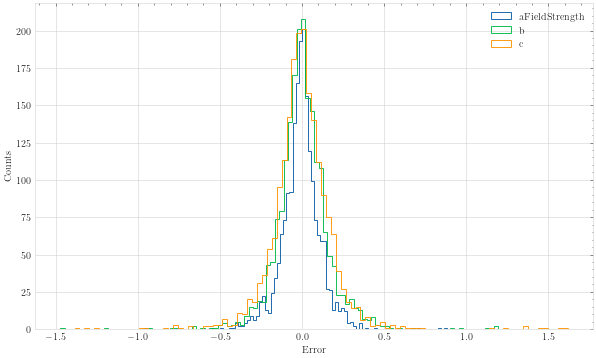

In [86]:
plt.figure(figsize=(10,6), facecolor='white')
plt.hist(absoluteerror.T[0],bins=100,alpha = 0.9,label = 'aFieldStrength',histtype = 'step')
plt.hist(absoluteerror.T[1],bins=100,alpha = 0.9,label = 'b',histtype = 'step')
plt.hist(absoluteerror.T[2],bins=100,alpha = 0.9,label = 'c',histtype = 'step')

#plt.title('Error distributions with scaled parameters')
plt.xlabel('Error')
plt.ylabel('Counts')
plt.legend()
plt.savefig('images/eddt.png', dpi=300)

In [87]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred,multioutput='raw_values'))
print(r2_score(y_test,y_pred))

[0.98632422 0.97305968 0.9616162 ]
0.9736666975517165


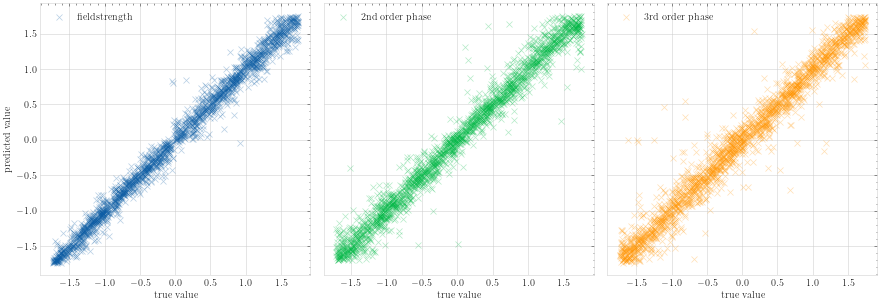

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5),sharey=True,sharex=False)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
#fig.suptitle('Absorption spectrum with different noise level')

ax1.scatter(x=y_test[:,0],y = y_pred[:,0],label = 'fieldstrength',marker= 'x',linewidths= 0.7,alpha = 0.3,color = 'C0')
ax2.scatter(x=y_test[:,1],y = y_pred[:,1],label = '2nd order phase',marker= 'x',linewidths= 0.7,alpha = 0.3,color = 'C1')
ax3.scatter(x=y_test[:,2],y = y_pred[:,2],label = '3rd order phase',marker= 'x',linewidths= 0.7,alpha = 0.3,color = 'C2')

ax1.legend(loc = 'upper left')
ax2.legend()
ax3.legend()

#ax1.set_ylim(-3,3)
ax1.set_xlabel('true value')
ax2.set_xlabel('true value')
ax3.set_xlabel('true value')

ax1.set_ylabel('predicted value')
#ax2.set_ylabel('intensity')
#ax3.set_ylabel('intensity')
#ax4.set_ylabel('intensity')
fig.savefig('images/pvtdt0.png', dpi=300)

## Fitting noisy data:

In [89]:
X, y = np.array(dataset["noise_spectrum_01"].tolist()), np.array(
    [dataset["aFieldStrength"].tolist(), dataset["b"].tolist(), dataset["c"].tolist()])

# only scale parameters not spectra
sc0, sc1, sc2 = StandardScaler().fit(y[0].reshape(-1, 1)), StandardScaler().fit(
    y[1].reshape(-1, 1)), StandardScaler().fit(y[2].reshape(-1, 1))
# concatenate scaled parameters and split into training and test set
y = np.array([sc0.transform(y[0].reshape(-1, 1)), sc1.transform(y[1].reshape(-1, 1)),
              sc2.transform(y[2].reshape(-1, 1))]).T.reshape(-1, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [91]:
r = export_text(regressor)
print(r)

|--- feature_1559 <= 0.80
|   |--- feature_1624 <= 0.21
|   |   |--- feature_1451 <= 0.32
|   |   |   |--- feature_1448 <= 0.22
|   |   |   |   |--- feature_1396 <= 0.38
|   |   |   |   |   |--- feature_1574 <= 0.73
|   |   |   |   |   |   |--- feature_1449 <= 0.20
|   |   |   |   |   |   |   |--- feature_2538 <= 0.02
|   |   |   |   |   |   |   |   |--- feature_2813 <= -0.02
|   |   |   |   |   |   |   |   |   |--- feature_801 <= -0.01
|   |   |   |   |   |   |   |   |   |   |--- feature_1347 <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_1347 >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- value: [-1.37, -1.39, 0.78]
|   |   |   |   |   |   |   |   |   |--- feature_801 >  -0.01
|   |   |   |   |   |   |   |   |   |   |--- feature_1902 <= -0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_1902 >  -0.00


In [92]:
# Evaluate Model on Test Set
y_pred = regressor.predict(X_test)
absoluteerror = y_pred-y_test
print(np.mean(abs(absoluteerror)))
print(np.std(abs(absoluteerror)))

0.44552202962344456
0.5534165742524921


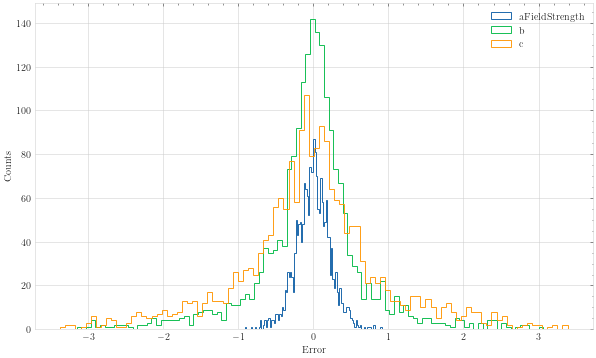

In [93]:
plt.figure(figsize=(10,6), facecolor='white')
plt.hist(absoluteerror.T[0],bins=100,alpha = 0.9,label = 'aFieldStrength',histtype = 'step')
plt.hist(absoluteerror.T[1],bins=100,alpha = 0.9,label = 'b',histtype = 'step')
plt.hist(absoluteerror.T[2],bins=100,alpha = 0.9,label = 'c',histtype = 'step')

#plt.title('Error distributions with scaled parameters')
plt.xlabel('Error')
plt.ylabel('Counts')
plt.legend()
plt.savefig('images/eddt01.png', dpi=300)

In [94]:
print(r2_score(y_test,y_pred,multioutput='raw_values'))
print(r2_score(y_test,y_pred))

[0.95030286 0.48985211 0.02847265]
0.4895425385791969


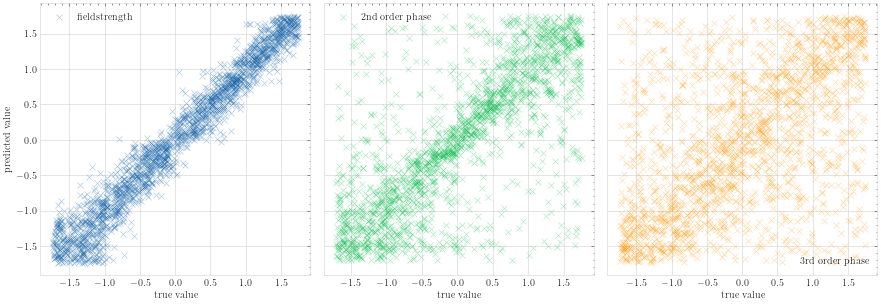

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5),sharey=True,sharex=False)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
#fig.suptitle('Absorption spectrum with different noise level')

ax1.scatter(x=y_test[:,0],y = y_pred[:,0],label = 'fieldstrength',marker= 'x',linewidths= 0.7,alpha = 0.3,color = 'C0')
ax2.scatter(x=y_test[:,1],y = y_pred[:,1],label = '2nd order phase',marker= 'x',linewidths= 0.7,alpha = 0.3,color = 'C1')
ax3.scatter(x=y_test[:,2],y = y_pred[:,2],label = '3rd order phase',marker= 'x',linewidths= 0.7,alpha = 0.3,color = 'C2')

ax1.legend(loc = 'upper left')
ax2.legend()
ax3.legend()

#ax1.set_ylim(-3,3)
ax1.set_xlabel('true value')
ax2.set_xlabel('true value')
ax3.set_xlabel('true value')

ax1.set_ylabel('predicted value')
#ax2.set_ylabel('intensity')
#ax3.set_ylabel('intensity')
#ax4.set_ylabel('intensity')
fig.savefig('images/pvtdt01.png', dpi=300)

## Improving by decreasing maximum depth and minimum number of samples in leaf nodes

In [96]:
X, y = np.array(dataset["noise_spectrum_01"].tolist()), np.array(
    [dataset["aFieldStrength"].tolist(), dataset["b"].tolist(), dataset["c"].tolist()])

# only scale parameters not spectra
sc0, sc1, sc2 = StandardScaler().fit(y[0].reshape(-1, 1)), StandardScaler().fit(
    y[1].reshape(-1, 1)), StandardScaler().fit(y[2].reshape(-1, 1))
# concatenate scaled parameters and split into training and test set
y = np.array([sc0.transform(y[0].reshape(-1, 1)), sc1.transform(y[1].reshape(-1, 1)),
              sc2.transform(y[2].reshape(-1, 1))]).T.reshape(-1, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
regressor = DecisionTreeRegressor(random_state=0,max_depth=8,min_samples_leaf = 3)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=3, random_state=0)

In [98]:
r = export_text(regressor)
print(r)

|--- feature_1559 <= 0.80
|   |--- feature_1624 <= 0.21
|   |   |--- feature_1451 <= 0.32
|   |   |   |--- feature_1448 <= 0.22
|   |   |   |   |--- feature_1396 <= 0.38
|   |   |   |   |   |--- feature_1574 <= 0.73
|   |   |   |   |   |   |--- feature_1449 <= 0.20
|   |   |   |   |   |   |   |--- feature_2538 <= 0.02
|   |   |   |   |   |   |   |   |--- value: [-1.45, -0.16, -0.24]
|   |   |   |   |   |   |   |--- feature_2538 >  0.02
|   |   |   |   |   |   |   |   |--- value: [-1.47, -0.27, 0.50]
|   |   |   |   |   |   |--- feature_1449 >  0.20
|   |   |   |   |   |   |   |--- feature_1305 <= 0.17
|   |   |   |   |   |   |   |   |--- value: [-1.45, -0.43, 0.68]
|   |   |   |   |   |   |   |--- feature_1305 >  0.17
|   |   |   |   |   |   |   |   |--- value: [-1.41, 0.25, -0.10]
|   |   |   |   |   |--- feature_1574 >  0.73
|   |   |   |   |   |   |--- feature_1450 <= 0.24
|   |   |   |   |   |   |   |--- feature_1568 <= 0.45
|   |   |   |   |   |   |   |   |--- value: [-1.18, -0.65

In [99]:
# Evaluate Model on Test Set
y_pred = regressor.predict(X_test)
absoluteerror = y_pred-y_test
print(np.mean(abs(absoluteerror)))
print(np.std(abs(absoluteerror)))

0.38146421794939944
0.43751363893893247


In [100]:
print(r2_score(y_test,y_pred,multioutput='raw_values'))
print(r2_score(y_test,y_pred))

[0.96164051 0.66293445 0.35332013]
0.6592983649824657


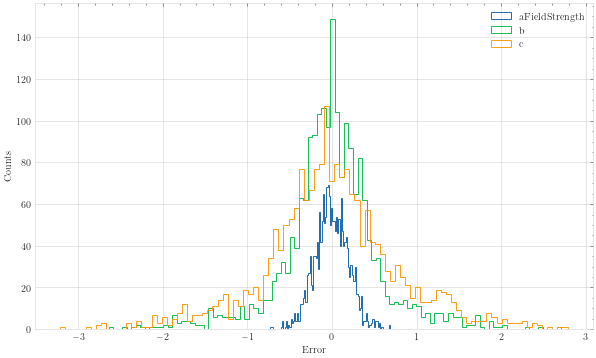

In [101]:
plt.figure(figsize=(10,6), facecolor='white')
plt.hist(absoluteerror.T[0],bins=100,alpha = 0.9,label = 'aFieldStrength',histtype = 'step')
plt.hist(absoluteerror.T[1],bins=100,alpha = 0.9,label = 'b',histtype = 'step')
plt.hist(absoluteerror.T[2],bins=100,alpha = 0.9,label = 'c',histtype = 'step')

#plt.title('Error distributions with scaled parameters')
plt.xlabel('Error')
plt.ylabel('Counts')
plt.legend()
plt.savefig('images/eddt01improv.png', dpi=300)

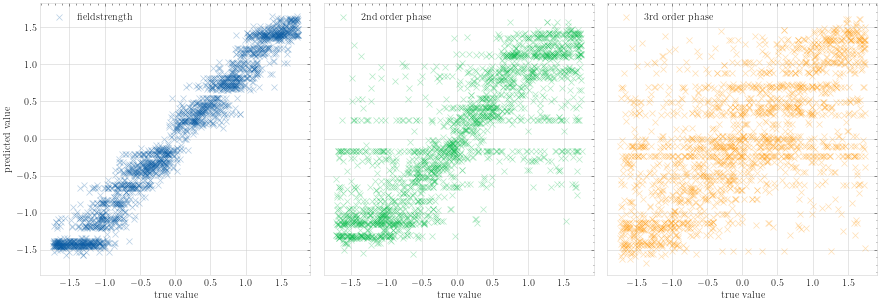

In [102]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5),sharey=True,sharex=False)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
#fig.suptitle('Absorption spectrum with different noise level')

ax1.scatter(x=y_test[:,0],y = y_pred[:,0],label = 'fieldstrength',marker= 'x',linewidths= 0.7,alpha = 0.3,color = 'C0')
ax2.scatter(x=y_test[:,1],y = y_pred[:,1],label = '2nd order phase',marker= 'x',linewidths= 0.7,alpha = 0.3,color = 'C1')
ax3.scatter(x=y_test[:,2],y = y_pred[:,2],label = '3rd order phase',marker= 'x',linewidths= 0.7,alpha = 0.3,color = 'C2')

ax1.legend(loc = 'upper left')
ax2.legend()
ax3.legend()

#ax1.set_ylim(-3,3)
ax1.set_xlabel('true value')
ax2.set_xlabel('true value')
ax3.set_xlabel('true value')

ax1.set_ylabel('predicted value')
#ax2.set_ylabel('intensity')
#ax3.set_ylabel('intensity')
#ax4.set_ylabel('intensity')
fig.savefig('images/pvtdt01improv.png', dpi=300)